In [44]:
import pandas as pd

path = r'C:\Users\camere\Conda_3.11_enviroment\CSV DATA\brent tick data from 1jan2024.csv'
price = pd.read_csv(path, parse_dates=True, index_col=0)

In [45]:
bid_price = price['bidPrice'].resample('1min').ohlc()
print(bid_price)

                       open    high     low   close
timestamp                                          
2024-01-02 01:00:00  77.403  77.668  77.403  77.638
2024-01-02 01:01:00  77.628  78.063  77.628  77.923
2024-01-02 01:02:00  77.913  78.033  77.794  78.018
2024-01-02 01:03:00  78.013  78.128  78.008  78.018
2024-01-02 01:04:00  78.023  78.218  78.023  78.163
...                     ...     ...     ...     ...
2024-09-13 20:55:00  72.062  72.067  72.052  72.062
2024-09-13 20:56:00  72.067  72.117  72.062  72.102
2024-09-13 20:57:00  72.092  72.112  72.092  72.112
2024-09-13 20:58:00  72.117  72.117  72.092  72.102
2024-09-13 20:59:00  72.085  72.090  72.055  72.055

[368400 rows x 4 columns]


In [46]:
from numba import njit
import numpy as np


bid_price_array = bid_price['close'].to_numpy()
@njit
def CalculateLogReturns(price):
    returns_array = np.zeros(len(price))
    for i in range(1, len(price)):
        returns_array[i] = np.log(price[i] / price[i-1])
    return returns_array

bid_returns = CalculateLogReturns(bid_price_array)

In [49]:
@njit
def CalculateRollingRealizedVolatility(returns):
    RV = np.zeros(len(returns))
    for i in range(window, len(returns)):
        RV[i] = np.sqrt(np.sum(returns[i-window:i]**2))
    return RV

window = 60
realized_volatility = CalculateRollingRealizedVolatility(bid_returns)

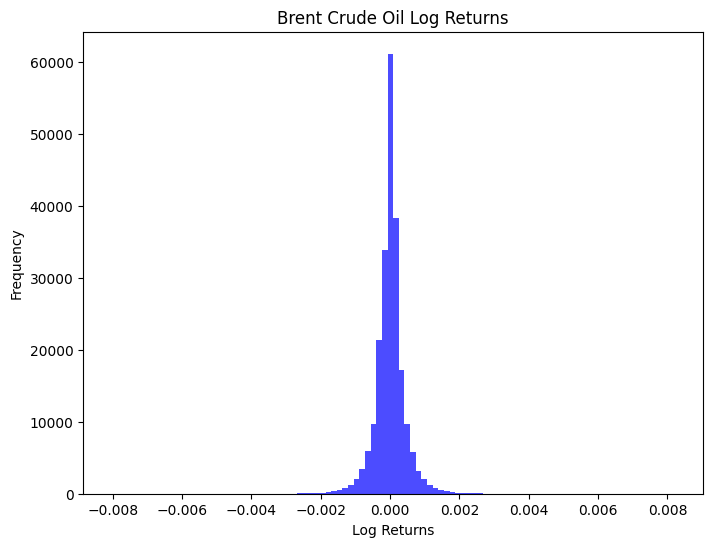

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(bid_returns, bins=100, color='blue', alpha=0.7)    
plt.title('Brent Crude Oil Log Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

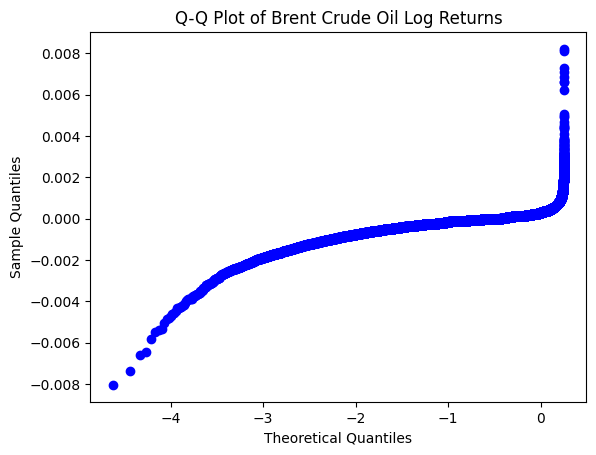

In [48]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming bid_returns is already defined
stats.probplot(bid_returns, dist="norm", plot=plt)
plt.title('Q-Q Plot of Brent Crude Oil Log Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()